# Subsetting pan-GI objects for pseudobulking and DGE analysis
1. Surface foveolar cells and mucous gland neck - comment 2.21
- Small intestine only, no covariates
2. Paneth cells - comment 3.1
- Across atlas - large intestine
- study as covariate?
3. All cell types in small intestine (IBD vs healthy) comment 2.13
- Use study as a covariate
- Focus on stem cells - comment 3.3
4. Compare MUC6 and MUC5AC in stomach vs duodenum, stomach vs ileum, duodenum vs ileum
- No covariates?
5. Oral mucosa fibroblasts from health, periodontitis and IBD
##### Make multiple objects to reflect these analyses
Pseudobulk and DGE done by Jacqueline Boccacino

In [32]:
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
adata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/pooled_healthy_disease.plus_additional_epi.18485genes.with_fineannot.nodoublets.20230322.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 1596203 × 18485
    var: 'gene_ids-0', 'feature_type-0', 'mito-0', 'ribo-0', 'hb-0', 'cc-0', 'ig-0', 'tcr-0', 'n_counts-0-0', 'n_counts_raw-0-0', 'n_counts_spliced-0-0', 'n_counts_unspliced-0-0', 'n_cells-0-0', 'n_cells_raw-0-0', 'n_cells_spliced-0-0', 'n_cells_unspliced-0-0', 'n_counts-1-0', 'n_counts_raw-1-0', 'n_counts_spliced-1-0', 'n_counts_unspliced-1-0', 'n_cells-1-0', 'n_cells_raw-1-0', 'n_cells_spliced-1-0', 'n_cells_unspliced-1-0', 'gene_ids-0-0-1', 'feature_type-0-0-1', 'mito-0-0-1', 'ribo-0-0-1', 'hb-0-0-1', 'n_counts-0-0-1', 'n_counts_raw-0-0-1', 'n_counts_spliced-0-0-1', 'n_counts_unspliced-0-0-1', 'n_cells-0-0-1', 'n_cells_raw-0-0-1', 'n_cells_spliced-0-0-1', 'n_cells_unspliced-0-0-1', 'cc-0-0-1', 'ig-0-0-1', 'tcr-0-0-1', 'gene_id-1-0-1', 'mt-1-0-1', 'ensmbl_id-colon-1-0-1', 'n_cells_by_counts-colon-1-0-1', 'mean_counts-colon-1-0-1', 'pct_dropout_by_counts-colon-1-0-1', 'total_counts-colon-1-0-1', 'n_cells_by_counts-ileum-1-0-1', 'mea

In [6]:
adata.obs = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/metadata/pooled_healthy_disease.plus_additional_epi.18485genes.with_fineannot.nodoublets.20230322.csv',index_col=0)

/home/jovyan/my-conda-envs/standard/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3,5,6,8,9,11,12,14,62,63,64,65,66,67,70,73,75,82,83,84,86,92,93,95,100,101,102,105,106,108,109,111,112,113,114,115,117,119,123,124,125,126,127,128,129,130,131,132,133) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### 1. Surface foveolar cells and mucous gland neck - comment 2.21

In [7]:
metaplastic = adata[adata.obs.level_3_annot.isin(['Surface_foveolar','Mucous_gland_neck'])].copy()

In [8]:
metaplastic

AnnData object with n_obs × n_vars = 34714 × 18485
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spl

In [21]:
metaplastic_si = metaplastic[metaplastic.obs.organ_groups.isin(['Small_intestine'])].copy()

In [10]:
metaplastic_si

AnnData object with n_obs × n_vars = 1266 × 18485
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spli

In [11]:
metaplastic_si.obs.level_3_annot.value_counts()

Surface_foveolar     949
Mucous_gland_neck    317
Name: level_3_annot, dtype: int64

In [14]:
pd.crosstab(metaplastic_si.obs.donorID_unified,metaplastic_si.obs.level_3_annot)

level_3_annot,Mucous_gland_neck,Surface_foveolar
donorID_unified,,
D11,59,574
D12,1,3
D13,4,62
D141,0,2
D152,8,0
D153,0,14
D157,0,1
D158,8,3
D160,2,1


In [15]:
df = pd.crosstab(metaplastic_si.obs.donorID_unified,metaplastic_si.obs.level_3_annot)

Text(0, 0.5, 'Surface_foveolar cell numbers')

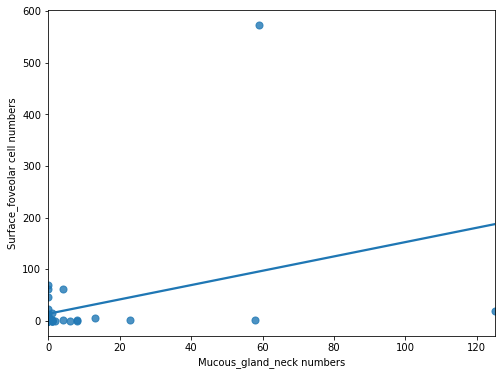

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

sns.regplot(x='Mucous_gland_neck', y='Surface_foveolar', data=df, scatter_kws={'s': 50}, ci=None)

# Add labels and title
plt.xlabel('Mucous_gland_neck numbers')
plt.ylabel('Surface_foveolar cell numbers')

In [18]:
metaplastic_si.obs.donor_category.value_counts()

control           871
disease           338
celiac_active      28
inutero            27
celiac_treated      2
Name: donor_category, dtype: int64

In [22]:
metaplastic_si = metaplastic_si[~metaplastic_si.obs.donor_category.isin(['inutero'])].copy()

In [23]:
metaplastic_si

AnnData object with n_obs × n_vars = 1239 × 18485
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spli

In [24]:
pd.crosstab(metaplastic_si.obs.donorID_unified,metaplastic_si.obs.disease)

disease,celiac_active,celiac_treated,control,crohns_disease,neighbouring_cancer,neighbouring_inflammed,neighbouring_polyps,pediatric_IBD
donorID_unified,,,,,,,,
D11,0,0,633,0,0,0,0,0
D12,0,0,4,0,0,0,0,0
D13,0,0,66,0,0,0,0,0
D141,0,0,0,0,0,2,0,0
D152,0,0,0,0,0,0,0,8
D153,0,0,0,0,0,0,0,14
D157,0,0,1,0,0,0,0,0
D158,0,0,11,0,0,0,0,0
D160,0,0,3,0,0,0,0,0


In [25]:
metaplastic_si.obs.donor_category.value_counts()

control           871
disease           338
celiac_active      28
celiac_treated      2
Name: donor_category, dtype: int64

In [26]:
metaplastic_si.obs.donor_disease.value_counts()

organ_donor         712
CD                  378
control              94
celiac_active        28
PIBD                 22
celiac_treated        2
cancer                2
jeuvenyle_polyps      1
Name: donor_disease, dtype: int64

In [27]:
metaplastic_si.obs.disease.value_counts()

control                   806
crohns_disease            316
neighbouring_inflammed     62
celiac_active              28
pediatric_IBD              22
celiac_treated              2
neighbouring_cancer         2
neighbouring_polyps         1
Name: disease, dtype: int64

In [29]:
metaplastic_si.obs.control_vs_disease.value_counts()

control           871
crohns_disease    316
celiac_active      28
pediatric_IBD      22
celiac_treated      2
Name: control_vs_disease, dtype: int64

In [30]:
metaplastic_si.obs['control_vs_disease_simple'] = (
    adata.obs["control_vs_disease"]
    .map(lambda x: {'crohns_disease':'IBD',
                    'pediatric_IBD':'IBD',
        
         }.get(x, x))
    .astype("category")
)

In [31]:
metaplastic_si.obs.control_vs_disease_simple.value_counts()

control               871
IBD                   338
celiac_active          28
celiac_treated          2
cancer_colorectal       0
cancer_gastric          0
inutero                 0
preterm                 0
ulcerative_colitis      0
Name: control_vs_disease_simple, dtype: int64

In [34]:
metaplastic_si.X.max()

3987.0

In [37]:
obs_to_keep = metaplastic_si.obs[['study','donorID_unified','level_3_annot','disease','control_vs_disease_simple']]

In [38]:
obs_to_keep

,study,donorID_unified,level_3_annot,disease,control_vs_disease_simple
index,,,,,
ACACCAAGTGGCCCTA-HCA_A_GT12935007,CBTM_unpublished,D99,Surface_foveolar,control,control
AGAGCGAAGTGGCACA-HCA_A_GT12935007,CBTM_unpublished,D99,Surface_foveolar,control,control
CAGAGAGGTTGAACTC-HCA_A_GT12935007,CBTM_unpublished,D99,Surface_foveolar,control,control
GCACTCTAGGTAGCTG-HCA_A_GT12935007,CBTM_unpublished,D99,Surface_foveolar,control,control
TACGGATCAGCATGAG-HCA_A_GT12935007,CBTM_unpublished,D99,Surface_foveolar,control,control
...,...,...,...,...,...
GATCTAGTCTCCGGTT-1_14-GI4394_DUO_EPI_GEX,Fitzpatrick2023,D160,Surface_foveolar,control,control
GGTGCGTCAAGCCGTC-1_14-GI4394_DUO_EPI_GEX,Fitzpatrick2023,D160,Mucous_gland_neck,control,control
ATCTACTCAAGACACG-1_16-GI4401_DUO_EPI_GEX,Fitzpatrick2023,D161,Surface_foveolar,celiac_active,celiac_active


In [39]:
metaplastic_si.obs

,latent_cell_probability,latent_RT_efficiency,cecilia22_predH,cecilia22_predH_prob,cecilia22_predH_uncertain,cecilia22_predL,cecilia22_predL_prob,cecilia22_predL_uncertain,elmentaite21_pred,elmentaite21_pred_prob,...,TX_immunomodulators,TX_antibiotic,Smoking,celltype,fine_predicted_labels_uncertflagged,organ_groups,disease,control_vs_disease,mapping_status,control_vs_disease_simple
index,,,,,,,,,,,,,,,,,,,,,
ACACCAAGTGGCCCTA-HCA_A_GT12935007,0.996419,0.452052,Epithelial cells,0.556518,Epithelial cells,Epithelial cells,0.730068,Epithelial cells,Enterocyte,0.289741,...,NaN,NaN,NaN,NaN,NaN,Small_intestine,control,control,remapped,control
AGAGCGAAGTGGCACA-HCA_A_GT12935007,0.993941,0.807485,Epithelial cells,0.790610,Epithelial cells,Epithelial cells,0.862732,Epithelial cells,Goblet cell,0.999771,...,NaN,NaN,NaN,NaN,NaN,Small_intestine,control,control,remapped,control
CAGAGAGGTTGAACTC-HCA_A_GT12935007,0.998623,0.908141,Epithelial cells,0.396156,Epithelial cells,Epithelial cells,0.125381,Uncertain,Enterocyte,0.745030,...,NaN,NaN,NaN,NaN,NaN,Small_intestine,control,control,remapped,control
GCACTCTAGGTAGCTG-HCA_A_GT12935007,0.998698,0.644047,Epithelial cells,0.066351,Uncertain,Epithelial cells,0.032311,Uncertain,Goblet cell,0.999973,...,NaN,NaN,NaN,NaN,NaN,Small_intestine,control,control,remapped,control
TACGGATCAGCATGAG-HCA_A_GT12935007,0.998365,1.121328,Epithelial cells,0.140491,Uncertain,Epithelial cells,0.010337,Uncertain,Goblet cell,0.953631,...,NaN,NaN,NaN,NaN,NaN,Small_intestine,control,control,remapped,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GATCTAGTCTCCGGTT-1_14-GI4394_DUO_EPI_GEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Stem,MUC5AC,Small_intestine,control,control,counts_matrix,control
GGTGCGTCAAGCCGTC-1_14-GI4394_DUO_EPI_GEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,MUC6+,Unknown,Small_intestine,control,control,counts_matrix,control
ATCTACTCAAGACACG-1_16-GI4401_DUO_EPI_GEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,MUC6+,MUC5AC,Small_intestine,celiac_active,celiac_active,counts_matrix,celiac_active


In [40]:
del metaplastic_si.obs

In [41]:
metaplastic_si.obs = obs_to_keep

In [42]:
metaplastic_si

AnnData object with n_obs × n_vars = 1239 × 18485
    obs: 'study', 'donorID_unified', 'level_3_annot', 'disease', 'control_vs_disease_simple'
    var: 'gene_ids-0', 'feature_type-0', 'mito-0', 'ribo-0', 'hb-0', 'cc-0', 'ig-0', 'tcr-0', 'n_counts-0-0', 'n_counts_raw-0-0', 'n_counts_spliced-0-0', 'n_counts_unspliced-0-0', 'n_cells-0-0', 'n_cells_raw-0-0', 'n_cells_spliced-0-0', 'n_cells_unspliced-0-0', 'n_counts-1-0', 'n_counts_raw-1-0', 'n_counts_spliced-1-0', 'n_counts_unspliced-1-0', 'n_cells-1-0', 'n_cells_raw-1-0', 'n_cells_spliced-1-0', 'n_cells_unspliced-1-0', 'gene_ids-0-0-1', 'feature_type-0-0-1', 'mito-0-0-1', 'ribo-0-0-1', 'hb-0-0-1', 'n_counts-0-0-1', 'n_counts_raw-0-0-1', 'n_counts_spliced-0-0-1', 'n_counts_unspliced-0-0-1', 'n_cells-0-0-1', 'n_cells_raw-0-0-1', 'n_cells_spliced-0-0-1', 'n_cells_unspliced-0-0-1', 'cc-0-0-1', 'ig-0-0-1', 'tcr-0-0-1', 'gene_id-1-0-1', 'mt-1-0-1', 'ensmbl_id-colon-1-0-1', 'n_cells_by_counts-colon-1-0-1', 'mean_counts-colon-1-0-1', 'pct_dropout

In [43]:
metaplastic_si.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/DGE_analysis_objects/Metaplastic_cells.control_vs_crohns.1239cells_18485genes.20231114.h5ad')

/home/jovyan/my-conda-envs/standard/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c


### 2. Paneth cells - comment 3.1

In [46]:
adata

AnnData object with n_obs × n_vars = 1596203 × 18485
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

In [47]:
paneth = adata[adata.obs.level_3_annot.isin(['Paneth'])].copy()

In [48]:
paneth

AnnData object with n_obs × n_vars = 4348 × 18485
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spli

In [49]:
paneth.obs.organ_unified.value_counts()

ileum              4054
ascending colon      94
colon                89
duodenum             62
small intestine      36
sigmoid colon         5
intestine             4
caecum                3
jejunum               1
Name: organ_unified, dtype: int64

In [57]:
paneth_adult = paneth[~paneth.obs.donor_category.isin(['inutero','preterm'])].copy()

In [58]:
paneth_adult

AnnData object with n_obs × n_vars = 4211 × 18485
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spli

In [59]:
paneth_adult.obs.organ_unified.value_counts()

ileum              4008
ascending colon      94
colon                89
duodenum             11
sigmoid colon         5
caecum                3
jejunum               1
Name: organ_unified, dtype: int64

In [60]:
paneth_adult.obs.organ_groups.value_counts()

Small_intestine    4020
Large_intestine     191
Name: organ_groups, dtype: int64

In [63]:
pd.set_option('display.max_rows', 100)
pd.crosstab(paneth_adult.obs.donorID_unified,paneth_adult.obs.organ_groups)

organ_groups,Large_intestine,Small_intestine
donorID_unified,,
D12,0,79
D135,1,0
D145,7,0
D15,0,2
D151,0,1
D152,0,4
D154,0,5
D156,0,15
D157,0,1


In [64]:
pd.set_option('display.max_rows', 100)
pd.crosstab(paneth_adult.obs.study,paneth_adult.obs.organ_groups)

organ_groups,Large_intestine,Small_intestine
study,,
CBTM_unpublished,0,24
Dominguez2022,0,1
Elmentaite2021,0,276
Fitzpatrick2023,0,6
Huang2019,2,0
Kong2023,180,3600
Lee2020,1,0
Martin2019,0,87
Parikh2019,7,0


In [66]:
paneth_adult.obs.disease.value_counts()

neighbouring_inflammed    3007
control                    800
crohns_disease             292
neighbouring_polyps         52
pediatric_IBD               27
neighbouring_cancer         21
ulcerative_colitis           8
celiac_treated               2
celiac_active                1
cancer_colorectal            1
Name: disease, dtype: int64

In [67]:
paneth_adult.obs.control_vs_disease.value_counts()

control               3880
crohns_disease         292
pediatric_IBD           27
ulcerative_colitis       8
celiac_treated           2
celiac_active            1
cancer_colorectal        1
Name: control_vs_disease, dtype: int64

In [68]:
pd.crosstab(paneth_adult.obs.disease,paneth_adult.obs.organ_groups)

organ_groups,Large_intestine,Small_intestine
disease,,
cancer_colorectal,1,0
celiac_active,0,1
celiac_treated,0,2
control,0,800
crohns_disease,20,272
neighbouring_cancer,0,21
neighbouring_inflammed,160,2847
neighbouring_polyps,0,52
pediatric_IBD,2,25


In [131]:
pd.crosstab(paneth_adult.obs.donorID_unified,paneth_adult.obs.organ_groups)

organ_groups,Large_intestine,Small_intestine
donorID_unified,,
D2,0,2
D3,0,2
D4,0,98
D5,0,50
D6,0,1
D8,0,17
D12,0,79
D15,0,2
D27,1,0


In [71]:
paneth_adult.obs['disease_organ'] = paneth_adult.obs['organ_groups'].astype(str) + '_' + paneth_adult.obs['disease'].astype(str) 

In [72]:
paneth_adult.obs['disease_organ'].value_counts()

Small_intestine_neighbouring_inflammed    2847
Small_intestine_control                    800
Small_intestine_crohns_disease             272
Large_intestine_neighbouring_inflammed     160
Small_intestine_neighbouring_polyps         52
Small_intestine_pediatric_IBD               25
Small_intestine_neighbouring_cancer         21
Large_intestine_crohns_disease              20
Large_intestine_ulcerative_colitis           8
Small_intestine_celiac_treated               2
Large_intestine_pediatric_IBD                2
Large_intestine_cancer_colorectal            1
Small_intestine_celiac_active                1
Name: disease_organ, dtype: int64

In [73]:
list(paneth_adult.obs['disease_organ'].unique())

['Small_intestine_control',
 'Small_intestine_neighbouring_polyps',
 'Small_intestine_neighbouring_inflammed',
 'Small_intestine_neighbouring_cancer',
 'Small_intestine_pediatric_IBD',
 'Large_intestine_cancer_colorectal',
 'Large_intestine_ulcerative_colitis',
 'Large_intestine_pediatric_IBD',
 'Small_intestine_crohns_disease',
 'Large_intestine_neighbouring_inflammed',
 'Large_intestine_crohns_disease',
 'Small_intestine_celiac_active',
 'Small_intestine_celiac_treated']

In [77]:
paneth_adult.obs['organ_disease_simple'] = (
    paneth_adult.obs["disease_organ"]
    .map(lambda x: {'Small_intestine_control':'Small_intestine_control',
 'Small_intestine_neighbouring_polyps':'Small_intestine_neighbouring_polyps',
 'Small_intestine_neighbouring_inflammed':'Small_intestine_neighbouring_inflamed',
 'Small_intestine_neighbouring_cancer':'Small_intestine_neighbouring_cancer',
 'Small_intestine_pediatric_IBD':'Small_intestine_neighbouring_IBD',
 'Large_intestine_cancer_colorectal':'Large_intestine_cancer_colorectal',
 'Large_intestine_ulcerative_colitis':'Large_intestine_metaplasia',
 'Large_intestine_pediatric_IBD':'Large_intestine_metaplasia',
 'Small_intestine_crohns_disease':'Small_intestine_neighbouring_IBD',
 'Large_intestine_neighbouring_inflammed':'Large_intestine_metaplasia',
 'Large_intestine_crohns_disease':'Large_intestine_metaplasia',
 'Small_intestine_celiac_active':'Small_intestine_celiac_active',
 'Small_intestine_celiac_treated':'Small_intestine_celiac_treated'
        
         }.get(x, x))
    .astype("category")
)

In [78]:
paneth_adult.obs['organ_disease_simple'].value_counts()

Small_intestine_neighbouring_inflamed    2847
Small_intestine_control                   800
Small_intestine_neighbouring_IBD          297
Large_intestine_metaplasia                190
Small_intestine_neighbouring_polyps        52
Small_intestine_neighbouring_cancer        21
Small_intestine_celiac_treated              2
Large_intestine_cancer_colorectal           1
Small_intestine_celiac_active               1
Name: organ_disease_simple, dtype: int64

In [79]:
obs_to_keep = paneth_adult.obs[['study','donorID_unified','level_3_annot','disease','organ_groups','organ_disease_simple']]

In [80]:
obs_to_keep

,study,donorID_unified,level_3_annot,disease,organ_groups,organ_disease_simple
index,,,,,,
ACGCAGCCAAAGAATC-HCA_A_GT12935007,CBTM_unpublished,D99,Paneth,control,Small_intestine,Small_intestine_control
ACGCCGACACTTGGAT-HCA_A_GT12935007,CBTM_unpublished,D99,Paneth,control,Small_intestine,Small_intestine_control
ACGGAGACAAGCGATG-HCA_A_GT12935007,CBTM_unpublished,D99,Paneth,control,Small_intestine,Small_intestine_control
ACTGAACTCGCCCTTA-HCA_A_GT12935007,CBTM_unpublished,D99,Paneth,control,Small_intestine,Small_intestine_control
AGTCTTTGTTGATTCG-HCA_A_GT12935007,CBTM_unpublished,D99,Paneth,control,Small_intestine,Small_intestine_control
...,...,...,...,...,...,...
ACACCCTTCCATGCTC-1_10-GI4345_DUO_EPI_GEX,Fitzpatrick2023,D159,Paneth,celiac_treated,Small_intestine,Small_intestine_celiac_treated
CATGGCGTCAGCTGGC-1_10-GI4345_DUO_EPI_GEX,Fitzpatrick2023,D159,Paneth,celiac_treated,Small_intestine,Small_intestine_celiac_treated
CATCAGATCAGAGACG-1_14-GI4394_DUO_EPI_GEX,Fitzpatrick2023,D160,Paneth,control,Small_intestine,Small_intestine_control


In [81]:
del paneth_adult.obs

In [82]:
paneth_adult.obs = obs_to_keep

In [83]:
paneth_adult.obs

,study,donorID_unified,level_3_annot,disease,organ_groups,organ_disease_simple
index,,,,,,
ACGCAGCCAAAGAATC-HCA_A_GT12935007,CBTM_unpublished,D99,Paneth,control,Small_intestine,Small_intestine_control
ACGCCGACACTTGGAT-HCA_A_GT12935007,CBTM_unpublished,D99,Paneth,control,Small_intestine,Small_intestine_control
ACGGAGACAAGCGATG-HCA_A_GT12935007,CBTM_unpublished,D99,Paneth,control,Small_intestine,Small_intestine_control
ACTGAACTCGCCCTTA-HCA_A_GT12935007,CBTM_unpublished,D99,Paneth,control,Small_intestine,Small_intestine_control
AGTCTTTGTTGATTCG-HCA_A_GT12935007,CBTM_unpublished,D99,Paneth,control,Small_intestine,Small_intestine_control
...,...,...,...,...,...,...
ACACCCTTCCATGCTC-1_10-GI4345_DUO_EPI_GEX,Fitzpatrick2023,D159,Paneth,celiac_treated,Small_intestine,Small_intestine_celiac_treated
CATGGCGTCAGCTGGC-1_10-GI4345_DUO_EPI_GEX,Fitzpatrick2023,D159,Paneth,celiac_treated,Small_intestine,Small_intestine_celiac_treated
CATCAGATCAGAGACG-1_14-GI4394_DUO_EPI_GEX,Fitzpatrick2023,D160,Paneth,control,Small_intestine,Small_intestine_control


In [84]:
paneth_adult

AnnData object with n_obs × n_vars = 4211 × 18485
    obs: 'study', 'donorID_unified', 'level_3_annot', 'disease', 'organ_groups', 'organ_disease_simple'
    var: 'gene_ids-0', 'feature_type-0', 'mito-0', 'ribo-0', 'hb-0', 'cc-0', 'ig-0', 'tcr-0', 'n_counts-0-0', 'n_counts_raw-0-0', 'n_counts_spliced-0-0', 'n_counts_unspliced-0-0', 'n_cells-0-0', 'n_cells_raw-0-0', 'n_cells_spliced-0-0', 'n_cells_unspliced-0-0', 'n_counts-1-0', 'n_counts_raw-1-0', 'n_counts_spliced-1-0', 'n_counts_unspliced-1-0', 'n_cells-1-0', 'n_cells_raw-1-0', 'n_cells_spliced-1-0', 'n_cells_unspliced-1-0', 'gene_ids-0-0-1', 'feature_type-0-0-1', 'mito-0-0-1', 'ribo-0-0-1', 'hb-0-0-1', 'n_counts-0-0-1', 'n_counts_raw-0-0-1', 'n_counts_spliced-0-0-1', 'n_counts_unspliced-0-0-1', 'n_cells-0-0-1', 'n_cells_raw-0-0-1', 'n_cells_spliced-0-0-1', 'n_cells_unspliced-0-0-1', 'cc-0-0-1', 'ig-0-0-1', 'tcr-0-0-1', 'gene_id-1-0-1', 'mt-1-0-1', 'ensmbl_id-colon-1-0-1', 'n_cells_by_counts-colon-1-0-1', 'mean_counts-colon-1-0-1', '

In [85]:
paneth_adult.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/DGE_analysis_objects/Paneth_cells.small_vs_large_intestine.4211cells_18485genes.20231114.h5ad')

### 3. All cell types in small intestine (IBD vs healthy) comment 2.13

In [87]:
adata_allgenes = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/pooled_healthy_disease.remapped.allgenes.fine_annot.no_doublets.20230322.h5ad')

In [88]:
adata_allgenes.obs = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/metadata/pooled_healthy_disease.remapped.allgenes.fine_annot.no_doublets.20230322.csv',index_col=0)

/home/jovyan/my-conda-envs/standard/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (73,82,83,84,86,93,102,105,112,113,114,115,117,119) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [89]:
adata_allgenes

AnnData object with n_obs × n_vars = 1358576 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

In [90]:
si = adata_allgenes[adata_allgenes.obs.organ_groups.isin(['Small_intestine'])].copy()

In [91]:
si_adult = si[~si.obs.donor_category.isin(['inutero','preterm'])].copy()

In [92]:
si_adult

AnnData object with n_obs × n_vars = 255591 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_sp

In [93]:
si_adult.obs.age_unified.value_counts()

55-74    49544
35-54    48593
4-7      20377
13-17    20284
18-34    18788
9-12     18372
75+      14906
Name: age_unified, dtype: int64

In [94]:
si_adult.obs.level_3_annot.value_counts()

Enterocyte                            47136
B_naive                               19369
B_memory                              16768
Trm_CD4                               16428
Trm_CD8                               15536
Tnaive/cm_CD4                         13290
B_plasma_IgA1                         13122
TA                                    11700
Trm/em_CD8                            10266
Tfh_naive                              7459
Trm_Th17                               7106
Treg_IL10                              7028
Treg                                   4680
Lamina_propria_fibroblast_ADAMDEC1     4031
B_plasma_IgG                           3993
gdT                                    3917
Tnaive/cm_CD8                          3660
Goblet                                 2843
Epithelial_stem                        2623
Tfh                                    2578
Macrophage                             2321
NK_CD56bright                          2109
BEST4_enterocyte_colonocyte     

In [95]:
si_adult.obs.control_vs_disease.value_counts()

control           177923
crohns_disease     48074
pediatric_IBD      29594
Name: control_vs_disease, dtype: int64

In [96]:
si_adult.obs['control_vs_disease_simple'] = (
    si_adult.obs["control_vs_disease"]
    .map(lambda x: {'crohns_disease':'IBD',
                    'pediatric_IBD':'IBD',
                    'control':'control'
        
         }.get(x, x))
    .astype("category")
)

In [98]:
obs_to_keep = si_adult.obs[['study','donorID_unified','level_3_annot','disease','control_vs_disease_simple']]

In [99]:
obs_to_keep

,study,donorID_unified,level_3_annot,disease,control_vs_disease_simple
index,,,,,
AAACGGGGTCCTAGCG-HCA_A_GT12934998,CBTM_unpublished,D105,Trm_CD4,control,control
AAACGGGTCAAAGTAG-HCA_A_GT12934998,CBTM_unpublished,D105,Treg_IL10,control,control
AAAGATGAGCGATTCT-HCA_A_GT12934998,CBTM_unpublished,D105,Monocyte,control,control
AAAGATGAGGCATTGG-HCA_A_GT12934998,CBTM_unpublished,D105,B_memory,control,control
AAAGCAACATACAGCT-HCA_A_GT12934998,CBTM_unpublished,D105,Tnaive/cm_CD8,control,control
...,...,...,...,...,...
TTTGTCAAGTTACCCA-GSM4766849,Jaeger2021,D141,T/NK_cycling,crohns_disease,IBD
TTTGTCACAATCGAAA-GSM4766849,Jaeger2021,D141,Trm_CD8,crohns_disease,IBD
TTTGTCACACCATCCT-GSM4766849,Jaeger2021,D141,Trm_CD8,crohns_disease,IBD


In [100]:
del si_adult.obs

In [101]:
si_adult.obs = obs_to_keep

In [102]:
si_adult

AnnData object with n_obs × n_vars = 255591 × 36601
    obs: 'study', 'donorID_unified', 'level_3_annot', 'disease', 'control_vs_disease_simple'
    var: 'gene_ids', 'feature_type', 'mito', 'ribo', 'hb', 'cc', 'ig', 'tcr', 'n_counts-0', 'n_counts_raw-0', 'n_counts_spliced-0', 'n_counts_unspliced-0', 'n_cells-0', 'n_cells_raw-0', 'n_cells_spliced-0', 'n_cells_unspliced-0', 'n_counts-1', 'n_counts_raw-1', 'n_counts_spliced-1', 'n_counts_unspliced-1', 'n_cells-1', 'n_cells_raw-1', 'n_cells_spliced-1', 'n_cells_unspliced-1'
    uns: 'age_unified_colors', 'control_vs_disease_colors', 'disease_colors', 'level_1_annot_colors', 'level_3_annot_colors', 'neighbors', 'organ_groups_colors', 'organ_unified_colors', 'study_colors', 'umap'
    obsm: 'X_mde', 'X_scANVI', 'X_umap', '_scvi_extra_continuous_covs'
    obsp: 'connectivities', 'distances'

In [103]:
si_adult.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/DGE_analysis_objects/All_celltypes.small_intestine.control_vs_IBD.255591cells_36601genes.20231114.h5ad')

### 4. Compare MUC6 and MUC5AC in stomach vs duodenum, stomach vs ileum, duodenum vs ileum

In [104]:
adata

AnnData object with n_obs × n_vars = 1596203 × 18485
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

In [106]:
metaplastic

AnnData object with n_obs × n_vars = 34714 × 18485
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spl

In [107]:
metaplastic.obs.organ_groups.value_counts()

Stomach            33448
Small_intestine     1266
Name: organ_groups, dtype: int64

In [108]:
metaplastic.obs.disease.value_counts()

neighbouring_cancer       19719
cancer_gastric            11257
control                    2517
inutero                     790
crohns_disease              316
neighbouring_inflammed       62
celiac_active                28
pediatric_IBD                22
celiac_treated                2
neighbouring_polyps           1
Name: disease, dtype: int64

In [109]:
metaplastic_include = metaplastic[metaplastic.obs.disease.isin(['neighbouring_cancer','control','crohns_disease','pediatric_IBD'])].copy()

In [110]:
metaplastic_include.obs['disease_organ'] = metaplastic_include.obs['organ_groups'].astype(str) + '_' + metaplastic_include.obs['disease'].astype(str)

In [111]:
metaplastic_include.obs['disease_organ'].value_counts()

Stomach_neighbouring_cancer            19717
Stomach_control                         1711
Small_intestine_control                  806
Small_intestine_crohns_disease           316
Small_intestine_pediatric_IBD             22
Small_intestine_neighbouring_cancer        2
Name: disease_organ, dtype: int64

In [113]:
metaplastic_include.obs['disease_organ_simple'] = (
    metaplastic_include.obs["disease_organ"]
    .map(lambda x: {'Stomach_neighbouring_cancer':'Stomach_control',
                    'Small_intestine_crohns_disease':'Small_intestine_IBD',
                    'Small_intestine_pediatric_IBD':'Small_intestine_IBD'
        
         }.get(x, x))
    .astype("category")
)

In [114]:
metaplastic_include.obs['disease_organ_simple'].value_counts()

Stomach_control                        21428
Small_intestine_control                  806
Small_intestine_IBD                      338
Small_intestine_neighbouring_cancer        2
Name: disease_organ_simple, dtype: int64

In [116]:
obs_to_keep = metaplastic_include.obs[['study','donorID_unified','level_3_annot','disease','organ_groups','disease_organ_simple']]

In [117]:
obs_to_keep

,study,donorID_unified,level_3_annot,disease,organ_groups,disease_organ_simple
index,,,,,,
AAACCTGCACGGTAAG-HCA_A_GT12935004,CBTM_unpublished,D99,Surface_foveolar,control,Stomach,Stomach_control
AAACCTGCATGTAAGA-HCA_A_GT12935004,CBTM_unpublished,D99,Mucous_gland_neck,control,Stomach,Stomach_control
AAACCTGTCCTCGCAT-HCA_A_GT12935004,CBTM_unpublished,D99,Surface_foveolar,control,Stomach,Stomach_control
AAACCTGTCGTAGGAG-HCA_A_GT12935004,CBTM_unpublished,D99,Surface_foveolar,control,Stomach,Stomach_control
AAACGGGCATCGATTG-HCA_A_GT12935004,CBTM_unpublished,D99,Mucous_gland_neck,control,Stomach,Stomach_control
...,...,...,...,...,...,...
I115208_N-TCTTTCCGTCAGAGGT-I115208_N,Kong2023,D179,Surface_foveolar,crohns_disease,Small_intestine,Small_intestine_IBD
I115208_N-GCGCCAAGTCCCTTGT-I115208_N,Kong2023,D179,Surface_foveolar,crohns_disease,Small_intestine,Small_intestine_IBD
CTGCGGATCAGTACGT-1_14-GI4394_DUO_EPI_GEX,Fitzpatrick2023,D160,Mucous_gland_neck,control,Small_intestine,Small_intestine_control


In [118]:
del metaplastic_include.obs

In [119]:
metaplastic_include.obs = obs_to_keep

In [120]:
metaplastic_include

AnnData object with n_obs × n_vars = 22574 × 18485
    obs: 'study', 'donorID_unified', 'level_3_annot', 'disease', 'organ_groups', 'disease_organ_simple'
    var: 'gene_ids-0', 'feature_type-0', 'mito-0', 'ribo-0', 'hb-0', 'cc-0', 'ig-0', 'tcr-0', 'n_counts-0-0', 'n_counts_raw-0-0', 'n_counts_spliced-0-0', 'n_counts_unspliced-0-0', 'n_cells-0-0', 'n_cells_raw-0-0', 'n_cells_spliced-0-0', 'n_cells_unspliced-0-0', 'n_counts-1-0', 'n_counts_raw-1-0', 'n_counts_spliced-1-0', 'n_counts_unspliced-1-0', 'n_cells-1-0', 'n_cells_raw-1-0', 'n_cells_spliced-1-0', 'n_cells_unspliced-1-0', 'gene_ids-0-0-1', 'feature_type-0-0-1', 'mito-0-0-1', 'ribo-0-0-1', 'hb-0-0-1', 'n_counts-0-0-1', 'n_counts_raw-0-0-1', 'n_counts_spliced-0-0-1', 'n_counts_unspliced-0-0-1', 'n_cells-0-0-1', 'n_cells_raw-0-0-1', 'n_cells_spliced-0-0-1', 'n_cells_unspliced-0-0-1', 'cc-0-0-1', 'ig-0-0-1', 'tcr-0-0-1', 'gene_id-1-0-1', 'mt-1-0-1', 'ensmbl_id-colon-1-0-1', 'n_cells_by_counts-colon-1-0-1', 'mean_counts-colon-1-0-1', 

In [121]:
metaplastic_include.obs.donorID_unified.value_counts()

D131    3383
D99     1597
D110    1333
D111    1327
D120    1263
D130    1060
D127     983
D124     964
D117     892
D115     869
D107     785
D126     760
D114     692
D133     651
D11      633
D123     547
D118     476
D132     466
D109     394
D112     392
D116     291
D134     287
D129     253
D121     239
D108     205
D106     204
D122     203
D119     183
D125     174
D113     164
D128     128
D90      122
D191     113
D91       72
D202      69
D13       66
D220      63
D92       62
D48       59
D185      47
D179      15
D153      14
D158      11
D43       10
D94       10
D152       8
D3         8
D42        5
D93        5
D12        4
D160       3
D186       2
D35        2
D214       1
D4         1
D41        1
D216       1
D157       1
D28        1
Name: donorID_unified, dtype: int64

In [122]:
metaplastic_include.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/DGE_analysis_objects/MUC6_MUC5AC.stomach_smallintestine.organ_disease_comparison.22574cells_18485genes.20231114.h5ad')

/home/jovyan/my-conda-envs/standard/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c


In [125]:
adata

AnnData object with n_obs × n_vars = 1596203 × 18485
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

### 5. Oral mucosa fibroblasts DGE

In [30]:
import scanpy as sc
import pandas as pd
import numpy as np

In [31]:
om_fibro = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/disease/pan-GI_atlas_plus_WilliamsPeriodontitis_mesenchyme.20231206_rawcounts.h5ad')

In [32]:
om_fibro.obs = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/metadata/disease/pan-GI_atlas_plus_WilliamsPeriodontitis_mesenchyme.20231206_rawcounts.csv',index_col=0)

/home/jovyan/my-conda-envs/standard/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,4,8,11,19,21,24,27,31,33,34,36,37,39,40,42,88,89,90,91,92,93,96,97,98,99,100,101,102,103,104,105,106,107,108,110,111,112,113,114,115,116,117,118,119,124,125,126,127,128,130,131,133,134,135,136,137,138,139,143) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [33]:
om_fibro

AnnData object with n_obs × n_vars = 81563 × 21932
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'project', 'percent.mt', 'S.Score', 'G2M.Score', 'paperLabels', 'donorID_unified', '_scvi_batch', 'fine_annot', '_scvi_labels', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'log1p_n_counts', 'percent_mito', 'fine_predicted_labels', 'fine_predicted_labels_uncertainty', 'scanvi_pred', 'donor_disease', 'disease', 'fine_predicted_labels_uncertflagged', 'leiden1', 'leiden0.5', 'fine_predicted_labels_resolved', 'level_3_annot', 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'n_genes', 'log1p_n_genes', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_

In [34]:
om_fibro.X.max()

7635.0

In [37]:
om_fibro.obs.level_3_annot.value_counts()

Crypt_fibroblast_PI16                 24914
Lamina_propria_fibroblast_ADAMDEC1    20317
Oral_mucosa_fibroblast                 8620
Vascular_smooth_muscle                 8489
Villus_fibroblast_F3                   7791
Pericyte                               5859
Myofibroblast                          2052
Rectum_fibroblast                      1445
Oesophagus_fibroblast                   769
Fibroblast_reticular                    689
Immune_recruiting_pericyte              402
Follicular_DC                           158
Mesothelium                              58
Name: level_3_annot, dtype: int64

In [38]:
om_fibro.obs.disease.value_counts()

control                   49902
neighbouring_cancer        7234
ulcerative_colitis         5454
periodontitis              4513
cancer_gastric             4410
cancer_colorectal          3660
pediatric_IBD              3453
neighbouring_polyps        1274
crohns_disease             1163
neighbouring_inflammed      500
Name: disease, dtype: int64

In [39]:
om_fibro.obs.control_vs_disease.value_counts()

control               58910
ulcerative_colitis     5454
cancer_gastric         4410
cancer_colorectal      3660
pediatric_IBD          3453
crohns_disease         1163
Name: control_vs_disease, dtype: int64

In [40]:
list(om_fibro.obs.disease.unique())

['periodontitis',
 'control',
 'neighbouring_cancer',
 'neighbouring_polyps',
 'neighbouring_inflammed',
 'pediatric_IBD',
 'cancer_colorectal',
 'ulcerative_colitis',
 'crohns_disease',
 'cancer_gastric']

In [41]:
om_fibro.obs['control_vs_disease_simple'] = (
    om_fibro.obs["disease"]
    .map(lambda x: {'periodontitis':'periodontitis',
 'control':'control',
 'neighbouring_cancer':'control',
 'neighbouring_polyps':'control',
 'neighbouring_inflammed':'control',
 'pediatric_IBD':'IBD',
 'cancer_colorectal':'cancer',
 'ulcerative_colitis':'IBD',
 'crohns_disease':'IBD',
 'cancer_gastric':'cancer'
        
         }.get(x, x))
    .astype("category")
)

In [42]:
om_fibro.obs.control_vs_disease_simple.value_counts()

control          58910
IBD              10070
cancer            8070
periodontitis     4513
Name: control_vs_disease_simple, dtype: int64

In [43]:
om_fibro = om_fibro[om_fibro.obs.level_3_annot.isin(['Oral_mucosa_fibroblast'])].copy()

In [44]:
om_fibro

AnnData object with n_obs × n_vars = 8620 × 21932
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'project', 'percent.mt', 'S.Score', 'G2M.Score', 'paperLabels', 'donorID_unified', '_scvi_batch', 'fine_annot', '_scvi_labels', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'log1p_n_counts', 'percent_mito', 'fine_predicted_labels', 'fine_predicted_labels_uncertainty', 'scanvi_pred', 'donor_disease', 'disease', 'fine_predicted_labels_uncertflagged', 'leiden1', 'leiden0.5', 'fine_predicted_labels_resolved', 'level_3_annot', 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'n_genes', 'log1p_n_genes', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_h

In [45]:
om_fibro.obs.control_vs_disease_simple.value_counts()

control          4378
periodontitis    1839
IBD              1232
cancer           1171
Name: control_vs_disease_simple, dtype: int64

In [46]:
pd.set_option('display.max_rows', 130) 
om_fibro.obs.donorID_unified.value_counts()

D77       643
D82       565
D80       464
PD161b    404
D85       370
PD164c    356
D21       354
PD164     271
D90       264
PD170     260
D73       245
D19       222
D152      221
D148      219
PD164b    215
D78       201
D149      192
D86       175
PD153     172
D13       168
D117      122
D22       118
D136      117
PD134     114
D151      112
D62       111
D39       103
D20        99
D74        96
D76        87
D75        84
D135       81
D87        70
D113       61
D26        59
D66        59
D67        58
D30        57
D115       48
PD161      47
D11        44
D71        43
D99        39
D137       38
D84        38
D29        37
D23        34
D119       33
D25        33
D150       32
D95        30
D81        30
D139       26
D112       25
D97        24
D41        24
D27        23
D2         22
D44        20
D45        20
D64        19
D92        19
D24        16
D100       16
D101       16
D110       14
D118       12
D116       11
D42        11
D79        10
D70         9
D107  

In [47]:
obs_to_keep = om_fibro.obs[['study','donorID_unified','level_3_annot','disease','control_vs_disease_simple']]

In [48]:
obs_to_keep

,study,donorID_unified,level_3_annot,disease,control_vs_disease_simple
PD134_AAAGATGTCTAGCACA-1-0,NaN,PD134,Oral_mucosa_fibroblast,periodontitis,periodontitis
PD134_AAAGCAAAGACCACGA-1-0,NaN,PD134,Oral_mucosa_fibroblast,periodontitis,periodontitis
PD134_AAATGCCAGCTAGCCC-1-0,NaN,PD134,Oral_mucosa_fibroblast,periodontitis,periodontitis
PD134_AAATGCCTCAGGATCT-1-0,NaN,PD134,Oral_mucosa_fibroblast,periodontitis,periodontitis
PD134_AACACGTGTAAATGTG-1-0,NaN,PD134,Oral_mucosa_fibroblast,periodontitis,periodontitis
...,...,...,...,...,...
GCTTGAAGTTTACTCT-GSM4546342-1,Kim2022,D127,Oral_mucosa_fibroblast,cancer_gastric,cancer
ATTTCTGGTCCATCCT-GSM4546346-1,Kim2022,D129,Oral_mucosa_fibroblast,cancer_gastric,cancer
TATGCCCTCTGGCGTG-GSM4546346-1,Kim2022,D129,Oral_mucosa_fibroblast,cancer_gastric,cancer
TCAACGAAGGAATGGA-GSM4546346-1,Kim2022,D129,Oral_mucosa_fibroblast,cancer_gastric,cancer


In [49]:
om_fibro

AnnData object with n_obs × n_vars = 8620 × 21932
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'project', 'percent.mt', 'S.Score', 'G2M.Score', 'paperLabels', 'donorID_unified', '_scvi_batch', 'fine_annot', '_scvi_labels', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'log1p_n_counts', 'percent_mito', 'fine_predicted_labels', 'fine_predicted_labels_uncertainty', 'scanvi_pred', 'donor_disease', 'disease', 'fine_predicted_labels_uncertflagged', 'leiden1', 'leiden0.5', 'fine_predicted_labels_resolved', 'level_3_annot', 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'n_genes', 'log1p_n_genes', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_h

In [50]:
del om_fibro.obs

In [51]:
om_fibro.obs = obs_to_keep

In [52]:
om_fibro

AnnData object with n_obs × n_vars = 8620 × 21932
    obs: 'study', 'donorID_unified', 'level_3_annot', 'disease', 'control_vs_disease_simple'
    var: 'name-0', 'gene_ids-1', 'feature_type-1', 'mito-1', 'ribo-1', 'hb-1', 'cc-1', 'ig-1', 'tcr-1', 'n_counts-0-1', 'n_counts_raw-0-1', 'n_counts_spliced-0-1', 'n_counts_unspliced-0-1', 'n_cells-0-1', 'n_cells_raw-0-1', 'n_cells_spliced-0-1', 'n_cells_unspliced-0-1', 'n_counts-1-1', 'n_counts_raw-1-1', 'n_counts_spliced-1-1', 'n_counts_unspliced-1-1', 'n_cells-1-1', 'n_cells_raw-1-1', 'n_cells_spliced-1-1', 'n_cells_unspliced-1-1'
    uns: 'disease_colors', 'level_3_annot_colors', 'neighbors', 'organ_groups_colors', 'umap'
    obsm: 'X_scANVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [53]:
om_fibro.obs.study.value_counts()

Williams2021        3146
Lee2020              958
Elmentaite2021       637
Kinchen2018          505
Kim2022              369
Uzzan2022            323
He2020GenomeBio      264
Martin2019           187
Pagella2021          140
Caetano2021          118
CBTM_unpublished      40
Jeong2021             40
CostaDaSilva2022      39
Chen2021               4
Huang2019              3
Madissoon2019          3
Yu2021                 3
Dominguez2022          1
James2020              1
Name: study, dtype: int64

In [54]:
om_fibro.obs['study'] = om_fibro.obs['study'].fillna('Williams2021')

In [55]:
om_fibro.obs.study.value_counts()

Williams2021        4985
Lee2020              958
Elmentaite2021       637
Kinchen2018          505
Kim2022              369
Uzzan2022            323
He2020GenomeBio      264
Martin2019           187
Pagella2021          140
Caetano2021          118
CBTM_unpublished      40
Jeong2021             40
CostaDaSilva2022      39
Chen2021               4
Huang2019              3
Madissoon2019          3
Yu2021                 3
Dominguez2022          1
James2020              1
Name: study, dtype: int64

In [56]:
om_fibro.X.max()

7635.0

In [2]:
#check om fibro counts

In [59]:
om_fibro

AnnData object with n_obs × n_vars = 8620 × 21932
    obs: 'study', 'donorID_unified', 'level_3_annot', 'disease', 'control_vs_disease_simple'
    var: 'name-0', 'gene_ids-1', 'feature_type-1', 'mito-1', 'ribo-1', 'hb-1', 'cc-1', 'ig-1', 'tcr-1', 'n_counts-0-1', 'n_counts_raw-0-1', 'n_counts_spliced-0-1', 'n_counts_unspliced-0-1', 'n_cells-0-1', 'n_cells_raw-0-1', 'n_cells_spliced-0-1', 'n_cells_unspliced-0-1', 'n_counts-1-1', 'n_counts_raw-1-1', 'n_counts_spliced-1-1', 'n_counts_unspliced-1-1', 'n_cells-1-1', 'n_cells_raw-1-1', 'n_cells_spliced-1-1', 'n_cells_unspliced-1-1'
    uns: 'disease_colors', 'level_3_annot_colors', 'neighbors', 'organ_groups_colors', 'umap'
    obsm: 'X_scANVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [60]:
om_fibro.X.max()

7635.0

In [61]:
atlas = om_fibro[~om_fibro.obs.disease.isin(['periodontitis'])]

In [62]:
peri = om_fibro[om_fibro.obs.disease.isin(['periodontitis'])]

In [63]:
atlas.X.max()

3704.0

In [64]:
peri.X.max()

7635.0

In [65]:
om_fibro.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/DGE_analysis_objects/Oral_mucosa_fibro.disease_comparison.8620cells_21932genes.20231206.h5ad')

### Jacqueline Boccacino running decoupleR and DESeq2 scripts